In [36]:
#Bibliotecas Mais Padrões
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split 


# Machine Learning: Algorítimos
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier


#Métricas_Classificação
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


#Processamento
from sklearn.preprocessing import MinMaxScaler # Verificar com Calma
from sklearn.preprocessing import StandardScaler # Verificar com Calma

import time


In [2]:
data1 = pd.read_csv("./base_dados\PRSA_Data_Aotizhongxin_20130301-20170228.csv",sep=',')
data2 = pd.read_csv("./base_dados\PRSA_Data_Changping_20130301-20170228.csv",sep=',')
data3 = pd.read_csv("./base_dados\PRSA_Data_Tiantan_20130301-20170228.csv",sep=',')
data4 = pd.read_csv("./base_dados\PRSA_Data_Wanshouxigong_20130301-20170228.csv",sep=',')
data5 = pd.read_csv("./base_dados\PRSA_Data_Dingling_20130301-20170228.csv",sep=',')
data6 = pd.read_csv("./base_dados\PRSA_Data_Dongsi_20130301-20170228.csv",sep=',')
data7 = pd.read_csv("./base_dados\PRSA_Data_Gucheng_20130301-20170228.csv",sep=',')
data8 = pd.read_csv("./base_dados\PRSA_Data_Huairou_20130301-20170228.csv",sep=',')
data9 = pd.read_csv("./base_dados\PRSA_Data_Guanyuan_20130301-20170228.csv",sep=',')
data10 = pd.read_csv("./base_dados\PRSA_Data_Nongzhanguan_20130301-20170228.csv",sep=',')
data11 = pd.read_csv("./base_dados\PRSA_Data_Shunyi_20130301-20170228.csv",sep=',')
data12 = pd.read_csv("./base_dados\PRSA_Data_Wanliu_20130301-20170228.csv",sep=',')


# Verificando Datasets menos defasados

In [4]:
k = [data1,data2,data3,data5,data6,data8,data4,data7,data9,data10,data11,data12]
num_=[1,2,3,4,5,6,7,8,9,10,11,12]
for i in range(len(k)):
  print("Data {} - Estação: {} - Dados Faltantes:".format(num_[i],k[i].station[0]),(k[i].isnull().sum().sum()))
#2, 7, 8, 10
# 10, 8, 7, 2, 3, 9, 12, 4, 1, 6, 5,11

Data 1 - Estação: Aotizhongxin - Dados Faltantes: 7271
Data 2 - Estação: Changping - Dados Faltantes: 5166
Data 3 - Estação: Tiantan - Dados Faltantes: 5277
Data 4 - Estação: Dingling - Dados Faltantes: 7015
Data 5 - Estação: Dongsi - Dados Faltantes: 7600
Data 6 - Estação: Huairou - Dados Faltantes: 7485
Data 7 - Estação: Wanshouxigong - Dados Faltantes: 5146
Data 8 - Estação: Gucheng - Dados Faltantes: 4728
Data 9 - Estação: Guanyuan - Dados Faltantes: 5279
Data 10 - Estação: Nongzhanguan - Dados Faltantes: 4090
Data 11 - Estação: Shunyi - Dados Faltantes: 8523
Data 12 - Estação: Wanliu - Dados Faltantes: 6447


#Escolhendo os Data Frames menos defasados


In [5]:
k = [data1,data2,data3,data5,data6,data8,data4,data7,data9,data10,data11,data12]
# data_colunas = ('PM2.5','PM10','SO2','NO2','CO','O3','TEMP','PRES','DEWP','RAIN','WSPM')
num_=[2,7,8,10]

for i in range(len(k)):
  k[i].fillna(value=k[i].median(), inplace= True)

for i in range(len(k)):
   k[i].dropna(inplace=True)


# for i in range(len(k)):
#   print("Data {}\n".format(num_[i]),k[i].isnull().sum())


In [137]:
df_one1 = data1.iloc[:5]
df_one2 = data2.iloc[:5]

df_one = pd.concat([df_one1,df_one2])

df_one



,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


#Concatenando os datasets

In [47]:
# 10, 8, 7, 2, 3, 9, 12, 4, 1, 6, 5, 11
data_2 = pd.concat([data10,data8,],ignore_index=True)
data_4 = pd.concat([data2,data7,data8,data10],ignore_index=True)
data_6= pd.concat([data2,data7,data8,data10,data3,data9],ignore_index=True)
data_8 = pd.concat([data2,data7,data8,data10,data3,data9,data12,data4],ignore_index=True)
data_10 = pd.concat([data2,data7,data8,data10,data3,data9,data12,data4,data1,data6],ignore_index=True)
data_12 = pd.concat([data1,data2,data3,data5,data6,data8,data4,data7,data9,data10,data11,data12],ignore_index=True)

data = data_4

#Matriz de Correlação

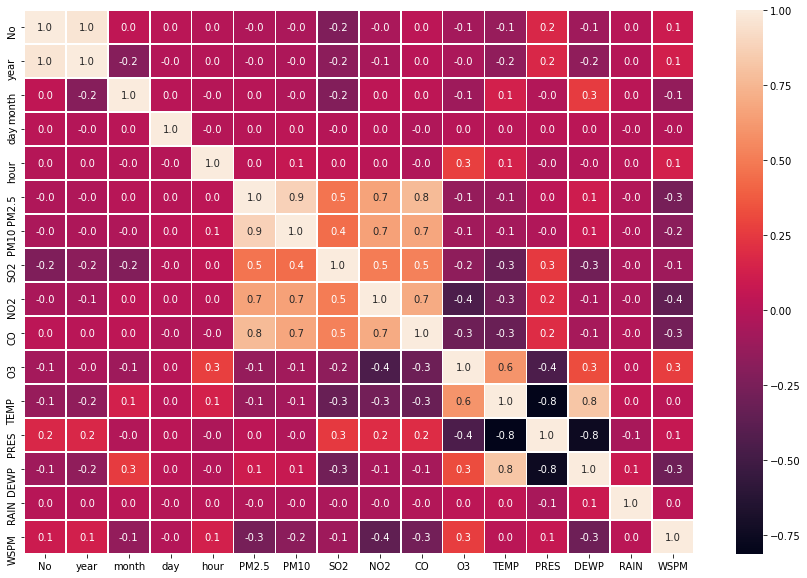

In [48]:
# análise de correlação
correlation = data.corr(method='pearson')

# plot da matriz de correlação
plt.figure(figsize=[15,10])
ax = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)

In [49]:
# print(data_.head())
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
No,139577.0,17492.762375,10117.477605,1.0000,8729.0,17485.0,26257.0,35064.0
year,139577.0,2014.657888,1.176495,2013.0000,2014.0,2015.0,2016.0,2017.0
month,139577.0,6.524986,3.445526,1.0000,4.0,7.0,10.0,12.0
day,139577.0,15.719997,8.803012,1.0000,8.0,16.0,23.0,31.0
hour,139577.0,11.507319,6.918404,0.0000,6.0,12.0,17.0,23.0
PM2.5,139577.0,76.752104,77.993543,2.0000,20.0,52.0,106.0,882.0
PM10,139577.0,103.100256,89.959095,2.0000,36.0,80.0,143.0,999.0
SO2,139577.0,15.148084,21.425316,0.2856,2.0,7.0,18.0,500.0
NO2,139577.0,47.462835,33.732175,1.0265,22.0,39.0,67.0,276.0
CO,139577.0,1190.335256,1108.412072,100.0000,500.0,900.0,1400.0,10000.0


# Definindo funções
*   Limetes
  * Superior
  * Inferior
*   Excluir Outliers
*   Plotando Boxplot
*   Plotando Histograma



In [9]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5* amplitude, q3 + 1.5*amplitude
def excluir_outliers(df, nome_coluna):
  qtd_linhas = df.shape[0]
  lim_inf, lim_sup= limites(df[nome_coluna])
  df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
  linhas_removidas = qtd_linhas - df.shape[0]
  return df, linhas_removidas

In [10]:
def diagrama_caixa(coluna):
  fig, (ax1, ax2) = plt.subplots(1,2)
  fig.set_size_inches(15,5)
  sns.boxplot(x=coluna, ax=ax1)
  ax2.set_xlim(limites(coluna))
  sns.boxplot(x= coluna, ax=ax2)

def histograma(coluna):
  plt.figure(figsize=(15,5))
  sns.histplot(coluna, kde=True)


def grafico_barra(coluna):
  plt.figure(figsize=(15,5))
  ax = sns.barplot(x=coluna.values_counts().index, y=coluna.values_counts())
  ax.set_xlim(limites(coluna))

# Plotando Graficos

In [11]:
# data_colunas = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']
# for j in data_colunas:
#   plt.title(data3.iloc[0,-1])
#   diagrama_caixa(data3[j])
#   histograma(data3[j])

In [12]:
# for j in data_colunas:
#   plt.title(data5.iloc[0,-1])
#   diagrama_caixa(data5[j])
#   histograma(data5[j])

In [13]:
# for j in data_colunas:
#   plt.title(data8.iloc[0,-1])
#   diagrama_caixa(data8[j])
#   histograma(data8[j])

In [14]:
# for j in data_colunas:
#   plt.title(data6.iloc[0,-1])
#   diagrama_caixa(data6[j])
#   histograma(data6[j])

# Modelo de Previsão
*   Random Forest
*   Logistic Regression
*   Decision Tree
*   SVM
*   RNA
*   KNN

In [50]:
modelo_rf = RandomForestClassifier()
modelo_lr = LogisticRegression()
modelo_dt = DecisionTreeClassifier()
modelo_svm = SVC()
modelo_knn = KNeighborsClassifier()
modelo_rna = Perceptron()
modelo_MLPC_rna = MLPClassifier()

modelos = { 
            'Random Forest' : modelo_rf,
            'Logistic Regression': modelo_lr,
            'Decision Tree': modelo_dt,
            'SVM': modelo_svm,
            'RNA' : modelo_rna,
            'Multi_RNA':modelo_MLPC_rna,
            'KNN': modelo_knn,
            
           }

y = data['station']
X = data.drop(columns=['No', 'station', 'wd'], axis=1)


# 'No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2','CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'


In [51]:
X

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,0.5
1,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,0.7
2,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,0.2
3,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,1.0
4,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139572,2017,2,28,19,14.0,21.0,3.0,27.0,400.0,72.0,12.5,1013.5,-16.2,0.0,2.4
139573,2017,2,28,20,18.0,27.0,3.0,37.0,400.0,59.0,11.6,1013.6,-15.1,0.0,0.9
139574,2017,2,28,21,15.0,39.0,5.0,50.0,600.0,41.0,10.8,1014.2,-13.3,0.0,1.1
139575,2017,2,28,22,11.0,35.0,6.0,49.0,500.0,41.0,10.5,1014.4,-12.9,0.0,1.2


# Metricas de Avaliação


In [52]:
def avaliar_modelo(nome_modelo, y_teste, previsao):
  accuracy = accuracy_score(y_teste, previsao)
  f1 = f1_score(y_teste, previsao,average='micro')


  return f'modelo:{nome_modelo} \n Accuracy:{accuracy}% \n F1:{f1}% \n '

# Divisão Base em Treino

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 95, test_size=0.3)

X_train_standardScaler = MinMaxScaler().fit_transform(X_train)

for nome_modelo, modelo in modelos.items():
  #treino
  começo=time.time()
  modelo.fit(X_train_standardScaler, y_train)
  fim = time.time()

  tempo = fim - começo

C:\Users\sp-xa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sp-xa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Teste e Verificação de Resultados

In [54]:
for nome_modelo, modelo in modelos.items():
  #testar
  X_test_standardScaler = MinMaxScaler().fit_transform(X_test)
  previsao = modelo.predict(X_test_standardScaler)

  print(avaliar_modelo(nome_modelo, y_test, previsao))

modelo:Random Forest 
 Accuracy:0.7242202798872809% 
 F1:0.724220279887281% 
 
modelo:Logistic Regression 
 Accuracy:0.48249510436070114% 
 F1:0.48249510436070114% 
 
modelo:Decision Tree 
 Accuracy:0.5373501456751206% 
 F1:0.5373501456751206% 
 
modelo:SVM 
 Accuracy:0.57255098629221% 
 F1:0.57255098629221% 
 
modelo:RNA 
 Accuracy:0.4179204279505182% 
 F1:0.4179204279505182% 
 
modelo:Multi_RNA 
 Accuracy:0.6126952285427711% 
 F1:0.6126952285427711% 
 
modelo:KNN 
 Accuracy:0.5574819697186798% 
 F1:0.5574819697186798% 
 


# Aplicação de GridSeachCV

## Arvore de Decisão

In [20]:
parametros = {
      'criterion': ['gini', 'entropy'],
      'splitter': ['best','random'],
      'min_samples_split': [2,5,10],
      'min_samples_leaf': [1,5,10]
      }

In [21]:
# #'gini', 'min_samples_leaf': 10, 'min_samples_split': 5, 'splitter': 'best'
# grid_search = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=parametros)
# grid_search.fit(X,y)
# melhores_parametros = grid_search.best_params_
# melhor_resultado= grid_search.best_score_

# print(melhores_parametros)
# print(melhor_resultado)

# Random Forest

In [22]:
parametros = {
      'criterion': ['gini', 'entropy'],
      'n_estimators': [10,40,100,150],
      'min_samples_split': [2,5,10],
      'min_samples_leaf': [1,5,10]
      }

In [23]:
# # {'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 150}
# grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid=parametros)
# grid_search.fit(X,y)
# melhores_parametros = grid_search.best_params_
# melhor_resultado= grid_search.best_score_

# print(melhores_parametros)
# print(melhor_resultado)

# KNN


In [24]:
parametros = {
    'n_neighbors': [3,5,10,20],
    'p': [1,2]
}

In [25]:
# #{n_neighbors= 20, p=1}
# grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=parametros)
# grid_search.fit(X,y)
# melhores_parametros = grid_search.best_params_
# melhor_resultado= grid_search.best_score_

# print(melhores_parametros)
# print(melhor_resultado)

# Regressão Logistica

In [26]:
parametros = {
    'tol': [0.0001,0.00001,0.000001],
    'C': [1.0,1.5,2.0],
    'solver':['newton-cg','lbfgs','liblinear','sag','saga']
}

In [27]:
# {'n_neighbors': 20, 'p': 1}
# grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid=parametros)
# grid_search.fit(X,y)
# melhores_parametros = grid_search.best_params_
# melhor_resultado= grid_search.best_score_

# print(melhores_parametros)
# print(melhor_resultado)

# SVM

In [28]:
parametros = {
    'C': [1.0,2.0,5.0,10],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
  }

In [29]:
# from sklearn.svm import SVC
# grid_search = GridSearchCV(estimator = SVC(), param_grid=parametros)
# grid_search.fit(X,y)
# melhores_parametros = grid_search.best_params_
# melhor_resultado= grid_search.best_score_

# print(melhores_parametros)
# print(melhor_resultado)

# RNA

In [30]:
parametros = {
    'max_iter': [100,200,500],
    'solver':['adam','lbfgs','sgd'],
    'activation':['identity', 'logistic', 'tanh', 'relu'],
    'tol':[0.0001,0.00001]
  }

In [31]:
# {'activation': 'logistic', 'max_iter': 200, 'solver': 'adam', 'tol': 1e-05}
# grid_search = GridSearchCV(estimator = MLPClassifier(), param_grid=parametros)
# grid_search.fit(X,y)
# melhores_parametros = grid_search.best_params_
# melhor_resultado= grid_search.best_score_

# print(melhores_parametros)
# print(melhor_resultado)

# Resultados Encontrados:
  ### > Variaveis Retiradas: ['station','wd'] <br>

- Random Forest <br>
          Accuracy:74.80% 
          F1:74.80% 
          Recall:74.80% 
          Precision:74.80% 
---
- Logistic Regression <br>
          Accuracy:35.36%
          F1:35.36%
          Recall:35.36%
          Precision:35.36%
---
- Decision Tree
          Accuracy:59.79%
          F1:59.79%
          Recall:59.79%
          Precision:59.79%
---
- KNN
          Accuracy:49.71%
          F1:49.71%
          Recall:49.71%
          Precision:49.71%

In [32]:
# importancia_features = pd.DataFrame(modelo_rf.feature_importances_, X_train.columns)
# importancia_features = importancia_features.sort_values(by=0, ascending=False)

# importancia_features

# plt.figure(figsize=(15,5))
# ax= sns.barplot(x=importancia_features.index, y=importancia_features[0])

In [33]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(modelo_rf)
cm.fit(X_train,y_train)
cm.score(X_test, y_test)

ModuleNotFoundError: No module named 'yellowbrick'

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(modelo_rf)
cm.fit(X_train,y_train)
cm.score(X_test, y_test)

In [ ]:
data1.columns

In [ ]:
data_

C:\Users\sp-xa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.8, 0.001, 'Elaboração dos autores')

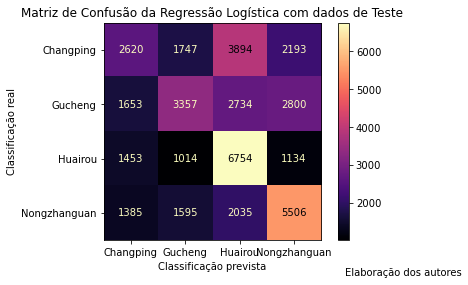

In [55]:
# Definindo a paleta de cores
cmap = "magma"

# Treinando a Regressão Logística
começo = time.time()
modelo_lr.fit(X_train,y_train)
fim = time.time()

# Definindo o tempo de treinamento da Regressão Logística
tempo_RL = fim - começo

# Matriz de confusão
plot_confusion_matrix(modelo_lr, 
                      X_test, 
                      y_test, 
                      cmap = cmap)

plt.grid(False)
plt.title("Matriz de Confusão da Regressão Logística com dados de Teste")
plt.xlabel("Classificação prevista")
plt.ylabel("Classificação real")
plt.figtext(0.8,0.001, "Elaboração dos autores", fontsize = 10)


In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, previsao))

              precision    recall  f1-score   support

   Changping       0.44      0.62      0.52     10454
     Gucheng       0.52      0.56      0.54     10544
     Huairou       0.63      0.51      0.57     10355
Nongzhanguan       0.76      0.53      0.63     10521

    accuracy                           0.56     41874
   macro avg       0.59      0.56      0.56     41874
weighted avg       0.59      0.56      0.56     41874



In [138]:


y_01 = df_one['station']
X_01 = df_one.drop(columns=['No', 'station', 'wd'], axis=1)

X_01

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0
0,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,0.5
1,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,0.7
2,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,0.2
3,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,1.0
4,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,2.1


In [139]:
X_01train, X_01test, y_01train, y_01test = train_test_split(X_01, y_01, test_size=0.3)

X_train_standardScaler = MinMaxScaler().fit_transform(X_01train)

for nome_modelo, modelo in modelos.items():
  #treino
  começo=time.time()
  modelo.fit(X_train_standardScaler, y_01train)
  fim = time.time()

  tempo = fim - começo

C:\Users\sp-xa\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [140]:
for nome_modelo, modelo in modelos.items():
  #testar
  X_test_standardScaler = MinMaxScaler().fit_transform(X_01test)
  previsao = modelo.predict(X_test_standardScaler)

In [146]:
X_01test
# previsao

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,0.5
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,4.7
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,5.6


In [147]:
X_01train
# y_01train

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,4.4
1,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,0.7
2,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,0.2
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,2.0
3,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,1.0
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,3.1
4,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,2.1
